# 02 Linear Regression

## Importing data

In [28]:
#!pip3 install sklearn

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [52]:
# Importing the dataset
df = pd.read_csv('market_prep.csv', sep=';')
df

,Education,Marital_Status,Income,Kidhome,Recency,NumWebVisitsMonth,Complain,all_Response,Age,CustomerDayLong,MNT,all_Purchases
0,2,4,58138.0,0,58,7.0,0.0,1.0,64.0,3314,1617.000000,25.0
1,2,4,46344.0,1,38,5.0,0.0,0.0,67.0,2764,27.000000,6.0
2,2,5,71613.0,0,26,4.0,0.0,0.0,56.0,2963,776.000000,21.0
3,2,5,26646.0,1,26,6.0,0.0,0.0,37.0,2790,53.000000,8.0
4,4,3,58293.0,1,94,5.0,0.0,0.0,40.0,2812,422.000000,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,61223.0,0,46,5.0,0.0,0.0,54.0,3032,1294.524192,18.0
2236,4,5,64014.0,2,56,7.0,0.0,1.0,75.0,2670,444.000000,22.0
2237,2,2,56981.0,0,91,6.0,0.0,1.0,40.0,2806,1241.000000,19.0
2238,3,5,69245.0,0,8,3.0,0.0,0.0,65.0,2807,843.000000,23.0


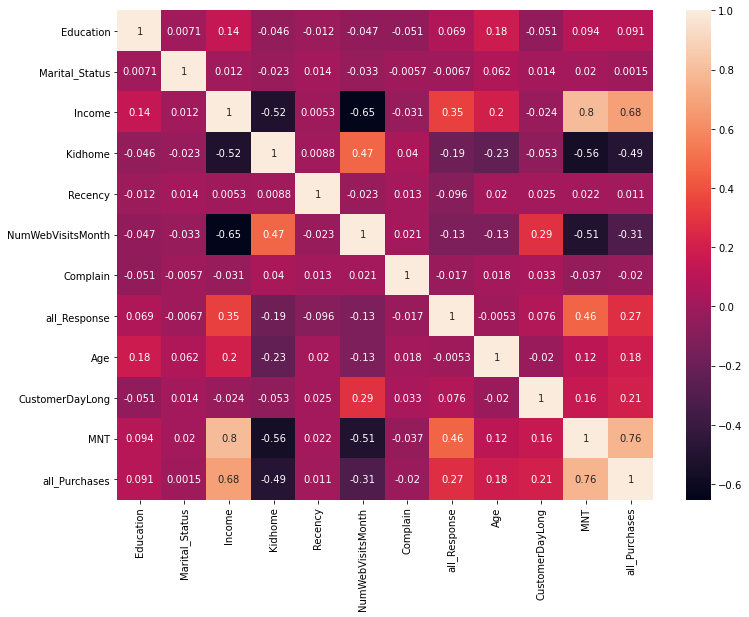

In [3]:

# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

## Splitting

Цель прогнозирования на данном этапе - прогноз дохода покупателей от предоставленных параметров.

In [53]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, [5,7,8,11,0]]  
y = df['Income']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Небходимо было убрать из модели общую сумму потраченную на покупки клиентом, чтобы предотвратить ошибку мультиколинеарности.

## Simple Linear Regression

In [54]:
# Fitting Simple Linear Regression to the Training set Income from MNT
f1 = ['all_Purchases']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([1898.35565978]), 23818.50427118738)

In [55]:

# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3)

0.457

In [56]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(15664.49, 14563.1)

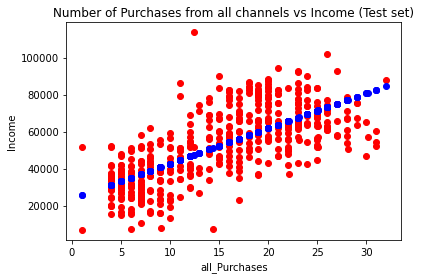

In [57]:
# Visualising the Test set results
plt.scatter(X_test['all_Purchases'], y_test, color = 'red')
plt.plot(X_test['all_Purchases'], sr.predict(X_test[f1]), 'bo')
plt.title('Number of Purchases from all channels vs Income (Test set)')
plt.xlabel('all_Purchases')
plt.ylabel('Income')
plt.show()

## Multiple Linear Regression

In [19]:
#!pip3 install statsmodels

In [58]:
# Fitting Multiple Regression
mr = LinearRegression().fit(X_train, y_train)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3)

0.702

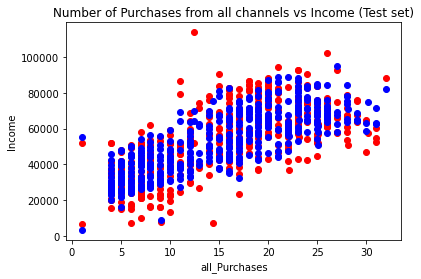

In [59]:
# Visualising the Test set results
plt.scatter(X_test['all_Purchases'], y_test, color = 'red')
plt.plot(X_test['all_Purchases'], mr.predict(X_test), 'bo')
plt.title('Number of Purchases from all channels vs Income (Test set)')
plt.xlabel('all_Purchases')
plt.ylabel('Income')
plt.show()

In [60]:

# Checking p-values
import statsmodels.api as sm
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     843.4
Date:                Sat, 20 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:14:44   Log-Likelihood:                -19313.
No. Observations:                1792   AIC:                         3.864e+04
Df Residuals:                    1786   BIC:                         3.867e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.676e+04   1644.704     28.430      0.000    4.35e+04       5e+04
NumWebVisitsMonth -4354.3338    123.774    -35.180      0.000   -4597.090   -4111.577
all_Response       3899.8985    354.155     11.012      0.000    3205.296    4594.501
Age                  73.5207     24.408      3.012      0.003      25.649     121.393
all_Purchases      1317.2381     40.046     32.893      0.000    1238.697    1395.780
Education          1376.6206    248.323      5.544      0.000     889.586    1863.655
==============================================================================
Omnibus:                      365.648   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3627.269
Skew:                           0.659   Prob(JB):                         0.00
Kurtosis:                       9.844   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 достаточно высокий чтобы считать, что модель достаточно хорошо описывает данные.
По критерию t остались лишь, такие поля как: кол-во посещений веб-страницы, ответ на стратегию, возраст, кол-во покупок со всех каналов продаж, образование.

## Recursive feature elimination

In [61]:
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE
n_features = X.shape[1]
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select = 3)
selector = selector.fit(X, y)

# Selected Features
selected_columns=[]
for i in range(n_features):
    if selector.support_[i] == True:
        selected_columns.append(i)
        
f_lm = []
for column in selected_columns:
    f_lm.append(X.columns[column])

In [62]:

# Fitting Optimized Multiple Regression
mr_rfe = LinearRegression().fit(X_train[f_lm], y_train)

# Getting parameters
mr_rfe.coef_, mr_rfe.intercept_

(array([-4400.74916979,  3929.21719817,  1347.16541993]), 53669.10077521864)

In [63]:
# Predicting the Test set results
y_pred = mr_rfe.predict(X_test[f_lm])

# Coefficient of determination R^2
mr_rfe.score(X_train[f_lm], y_train).round(3)

0.695

In [64]:
# Mean squared error
mean_squared_error(y_train, mr_rfe.predict(X_train[f_lm]), squared=False).round(2), mean_squared_error(y_test, y_pred, squared=False).round(2)

(11744.88, 10872.53)

R^2 в сравнении с прошлой моделью не сильно уменьшился, что в данном случае не есть критично, а вот ошибки немного снизились.

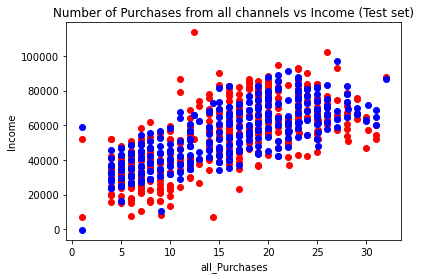

In [67]:
# Visualising the Test set results
plt.scatter(X_test['all_Purchases'], y_test, color = 'red')
plt.plot(X_test['all_Purchases'], mr_rfe.predict(X_test[f_lm]), 'bo')
plt.title('Number of Purchases from all channels vs Income (Test set)')
plt.xlabel('all_Purchases')
plt.ylabel('Income')
plt.show()


## Backward Elimination

In [68]:
# Backward Elimination with p-values
def backwardElimination(x, y, sl):
    x = sm.add_constant(x)
    numVars = x.shape[1]
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = x.drop(x.columns[j], axis=1)
    regressor_OLS.summary()
    return x

SL = 0.0001
X_Modeled = backwardElimination(X_train, y_train, SL)

In [69]:
# Fitting Optimized Multiple Regression
mr_be = LinearRegression().fit(X_Modeled, y_train)

# Coefficient of determination R^2
mr_be.score(X_Modeled, y_train).round(3)

0.701

## Polynomial Regression

In [70]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train_p, y_train)

# Getting parameters
pr.coef_, pr.intercept_

(array([ 0.00000000e+00, -8.84080506e+03,  4.12563753e+03,  4.30282215e+02,
         1.92265109e+03,  3.63797190e+03,  2.67646180e+02, -2.66819560e+02,
         2.08473858e+01,  6.15292536e+01, -7.88475804e+00,  8.66620238e+02,
         1.29321736e+01, -4.63111432e+01, -4.16128493e+02, -2.58437969e+00,
        -9.37923771e+00, -2.21959283e+01, -6.19385910e+00, -1.04207104e+02,
         1.13323625e+02]),
 41026.05484289992)

In [71]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p)

# Coefficient of determination R^2
pr.score(X_train_p, y_train).round(3)

0.718

In [72]:
# Mean squared error
mean_squared_error(y_train, pr.predict(X_train_p), squared=False).round(3), mean_squared_error(y_test, y_pred, squared=False).round(3)

(11292.378, 10883.713)

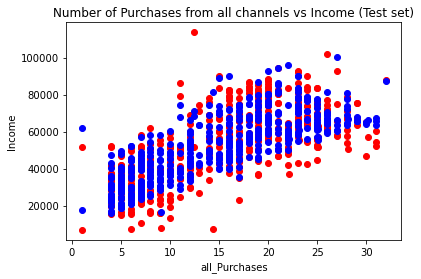

In [73]:
# Visualising the Test set results
plt.scatter(X_test['all_Purchases'], y_test, color = 'red')
plt.plot(X_test['all_Purchases'], pr.predict(X_test_p), 'bo')
plt.title('Number of Purchases from all channels vs Income (Test set)')
plt.xlabel('all_Purchases')
plt.ylabel('Income')
plt.show()

Что и следовало ожидать - полиномиальная модель лучше расмотренных ранее описывает данные, если в оценке опираться на R^2 и ошибки тестовой группы и основной.

## Pickle

In [74]:
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('data_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()